In [20]:
import tensorflow as tf;
import numpy as np;
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
n_features = 10
n_dense_neurons = 3

In [5]:
x = tf.placeholder(tf.float32,(None,n_features))

In [6]:
W = tf.Variable(tf.random_normal([n_features,n_dense_neurons]))
b= tf.Variable(tf.ones([n_dense_neurons]))

In [7]:
xW = tf.matmul(x,W)
z = tf.add(xW,b)

In [8]:
a = tf.sigmoid(z)

In [9]:
init = tf.global_variables_initializer()

In [12]:
with tf.Session() as sess:
    sess.run(init)
    layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [13]:
print(layer_out)

[[ 0.47715554  0.0223302   0.93997717]]


## Simple Regression Example

In [17]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)
x_data

array([-1.43119554,  1.05467537,  2.08927257,  3.69334674,  4.66366504,
        6.53021579,  7.6695633 ,  6.99096484,  9.53659224,  8.71434377])

In [18]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5, 10)
y_label

array([ -0.98429745,   1.04627387,   3.25772421,   4.11844019,
         5.18571595,   6.8032424 ,   5.3144233 ,   7.437836  ,
         9.29569502,  10.44306319])

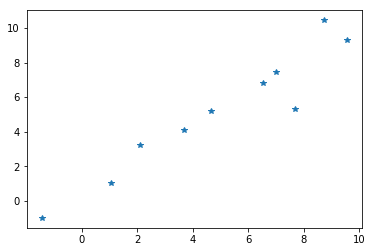

In [22]:
plt.plot(x_data,y_label,"*")

y = mx + b 

In [24]:
m = tf.Variable(0.44)
b = tf.Variable(0.87)

In [25]:
error = 0
for x,y in zip(x_data,y_label):
    y_hat = m*x + b
    error += (y-y_hat)**2

In [26]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [27]:
init = tf.global_variables_initializer()

In [32]:
with tf.Session() as sess:
    sess.run(init)
    training_steps = 100
    for i in range(training_steps):
        sess.run(train)
    final_slope, final_intercept = sess.run([m,b])

In [33]:
x_test = np.linspace(-1,11,10)

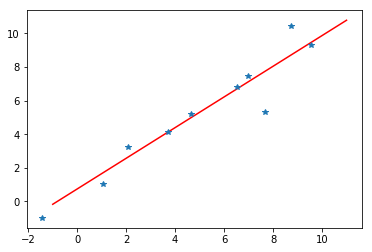

In [34]:
# y = mx + b
y_pred_plot = final_slope * x_test + final_intercept
plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,"*")